# Homework 4 - Nasir Khalid - 65082
-------------------------------------------------------

### Task 1 - Autoencoders and Dimensionality Reduction

We have to use the fashion MNIST dataset and train a densely connected autoencoder with one hidden layer. 32 nodes and 64 nodes in this layer with a rectied linear unit as the activation function.  In the output layer have a signmoid activation function. Train the autoencoder under squared error reconstruction loss function.

Now test the networks with the images in the testing data. Report the average reconstruction error for different number of nodes in the hidden layer.

Repeat the same with autoencoders with three hidden layers use 32 and 64 as the dimenionality of the codes

#### Importing Dataset, Normalizing, Reshaping, Making plot functions and average reconstruction error  function

In [0]:
# Importing dataset
from keras.datasets import fashion_mnist

# Splitting in to training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshaping and Normalizing the training/test data for the network
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])
test_images = test_images.astype('float32') / 255.0

# Final Lengths of All Data
print("\n-------- Final Dimensions --------")
print("Length of Training Images = " + str(train_images.shape))
print("Length of Test Images = " + str(test_images.shape))

# Names of each label
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


-------- Final Dimensions --------
Length of Training Images = (60000, 784)
Length of Test Images = (10000, 784)


Text(0.5, 1.0, 'Image 10337: Label #2 (Image of Pullover)')

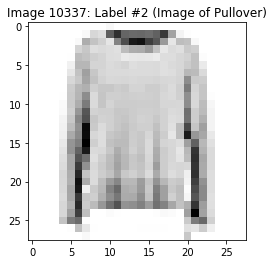

In [0]:
# Importing pyplot and numpy
import matplotlib.pyplot as plt
import numpy as np

# Display one image
r = np.random.randint(train_images.shape[0] + 1)
plt.imshow(train_images[r].reshape(28,28), cmap='Greys')
plt.title('Image {}: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

In [0]:
# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def reconstruction_error_curve(history):
  arc  = history.history['average_reconstruction_error']
  val_arc = history.history['val_average_reconstruction_error']
  x_axis     = range(1, len(history.history['average_reconstruction_error'])+1)
  
  plt.figure()
  plt.plot(x_axis, arc, label="Average Reconstruction Error")
  plt.plot(x_axis, val_arc, label="Validation Average Reconstruction Error")
  plt.ylabel('Average Reconstruction Error')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Average Reconstruction Error')
  plt.legend()
  
# Defining function for average reconstruction error
from keras.backend import mean, abs

def average_reconstruction_error(y_true, y_pred):
    return mean(abs(y_true - y_pred))

#### Training Encoder with 1 Hidden Layer that has 32 Nodes

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input


# Input layer is implicit once we provide input shape
Encoder_1_32 = Sequential()

# Hidden Layer with RELU
Encoder_1_32.add(Dense(32, input_shape=(train_images.shape[1], )))
Encoder_1_32.add(Activation('relu'))

# Output Layer with Sigmoid
Encoder_1_32.add(Dense(train_images.shape[1], ))
Encoder_1_32.add(Activation('sigmoid'))

# Compiling Network
Encoder_1_32.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Encoder_1_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_35 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 784)               25872     
_________________________________________________________________
activation_36 (Activation)   (None, 784)               0         
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
x = Encoder_1_32.fit(train_images,
                  train_images,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 83us/step - loss: 0.0288 - average_reconstruction_error: 0.1044 - val_loss: 0.0194 - val_average_reconstruction_error: 0.0830
Epoch 2/50
54000/54000 [==============================] - 4s 75us/step - loss: 0.0169 - average_reconstruction_error: 0.0760 - val_loss: 0.0152 - val_average_reconstruction_error: 0.0716
Epoch 3/50
54000/54000 [==============================] - 4s 75us/step - loss: 0.0152 - average_reconstruction_error: 0.0716 - val_loss: 0.0145 - val_average_reconstruction_error: 0.0701
Epoch 4/50
54000/54000 [==============================] - 4s 76us/step - loss: 0.0144 - average_reconstruction_error: 0.0696 - val_loss: 0.0140 - val_average_reconstruction_error: 0.0680
Epoch 5/50
54000/54000 [==============================] - 4s 75us/step - loss: 0.0140 - average_reconstruction_error: 0.0684 - val_loss: 0.0147 - val_average_reconstruction_error: 0.0687
Epoch 6/50
54000

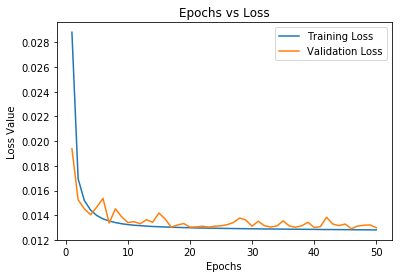

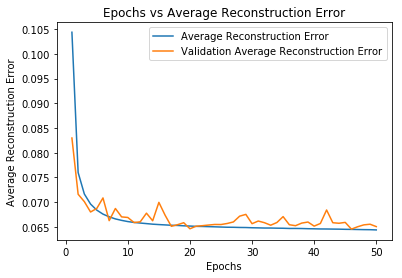

In [0]:
loss_curve(x)
reconstruction_error_curve(x)

In [0]:
score = Encoder_1_32.evaluate(test_images, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 0s 38us/step
Loss function on test set = 0.012966094452142715
Average Reconstruction Error = 0.06502606686353683


Text(0.5, 1.0, 'Image 15796: Label #5 (Image of Sandal)')

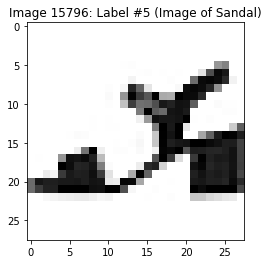

In [0]:
# Display one image
r = np.random.randint(train_images.shape[0] + 1)
plt.imshow(train_images[r].reshape(28,28), cmap='Greys')
plt.title('Image {}: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

Text(0.5, 1.0, 'Image 15796 Reconstruction with 1 Hidden layer and 32 Nodes: Label #5 (Image of Sandal)')

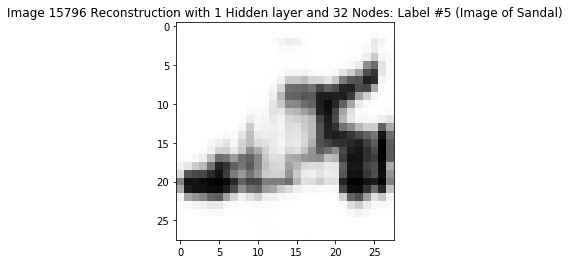

In [0]:
# Display reconstruction of the image
reconstruction = Encoder_1_32.predict(np.array([train_images[r]]))
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title('Image {} Reconstruction with 1 Hidden layer and 32 Nodes: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

#### Training Encoder with 1 Hidden Layer that has 64 Nodes

In [0]:
# Input layer is implicit once we provide input shape
Encoder_1_64 = Sequential()

# Hidden Layer with RELU
Encoder_1_64.add(Dense(64, input_shape=(train_images.shape[1], )))
Encoder_1_64.add(Activation('relu'))

# Output Layer with Sigmoid
Encoder_1_64.add(Dense(train_images.shape[1], ))
Encoder_1_64.add(Activation('sigmoid'))

# Compiling Network
Encoder_1_64.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Encoder_1_64.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_37 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 784)               50960     
_________________________________________________________________
activation_38 (Activation)   (None, 784)               0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [0]:
x = Encoder_1_64.fit(train_images,
                  train_images,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 82us/step - loss: 0.0249 - average_reconstruction_error: 0.0950 - val_loss: 0.0170 - val_average_reconstruction_error: 0.0779
Epoch 2/50
54000/54000 [==============================] - 4s 75us/step - loss: 0.0140 - average_reconstruction_error: 0.0682 - val_loss: 0.0124 - val_average_reconstruction_error: 0.0640
Epoch 3/50
54000/54000 [==============================] - 4s 76us/step - loss: 0.0120 - average_reconstruction_error: 0.0625 - val_loss: 0.0117 - val_average_reconstruction_error: 0.0611
Epoch 4/50
54000/54000 [==============================] - 4s 76us/step - loss: 0.0110 - average_reconstruction_error: 0.0597 - val_loss: 0.0103 - val_average_reconstruction_error: 0.0572
Epoch 5/50
54000/54000 [==============================] - 4s 74us/step - loss: 0.0104 - average_reconstruction_error: 0.0580 - val_loss: 0.0108 - val_average_reconstruction_error: 0.0604
Epoch 6/50
54000

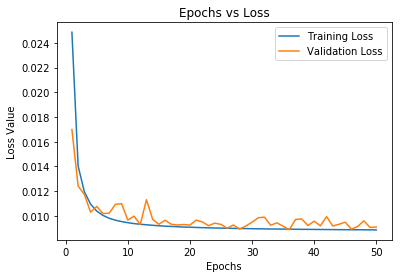

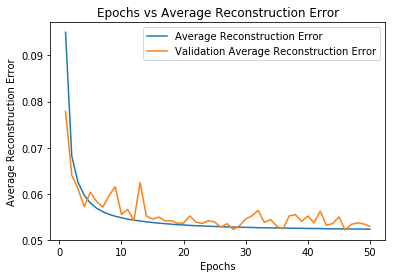

In [0]:
loss_curve(x)
reconstruction_error_curve(x)

In [0]:
score = Encoder_1_64.evaluate(test_images, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 0s 42us/step
Loss function on test set = 0.009074861389398574
Average Reconstruction Error = 0.05293741283416748


Text(0.5, 1.0, 'Image 15796 Reconstruction with 1 Hidden layer and 64 Nodes: Label #5 (Image of Sandal)')

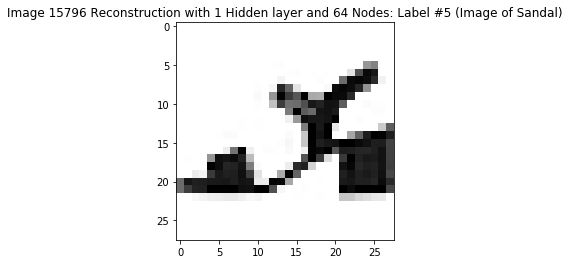

In [0]:
# Display same image
plt.imshow(train_images[r].reshape(28,28), cmap='Greys')
plt.title('Image {} : Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

Text(0.5, 1.0, 'Image 15796 Reconstruction with 1 Hidden layer and 64 Nodes: Label #5 (Image of Sandal)')

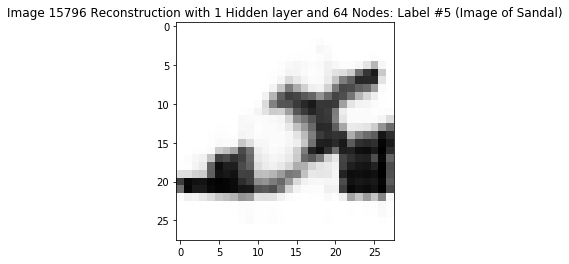

In [0]:
# Display reconstruction of the image
reconstruction = Encoder_1_64.predict(np.array([train_images[r]]))
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title('Image {} Reconstruction with 1 Hidden layer and 64 Nodes: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

#### Training Encoder with 3 Hidden layers, main layer has 32 Nodes

In [0]:
# Input layer is implicit once we provide input shape
Encoder_3_32 = Sequential()

# Hidden Layer #1 with RELU
Encoder_3_32.add(Dense(128, input_shape=(train_images.shape[1], )))
Encoder_3_32.add(Activation('relu'))

# Hidden Layer #2 (z layer) with RELU
Encoder_3_32.add(Dense(32))
Encoder_3_32.add(Activation('relu'))

# Hidden layer #3 with RELU
Encoder_3_32.add(Dense(128))
Encoder_3_32.add(Activation('relu'))

# Output Layer with Sigmoid
Encoder_3_32.add(Dense(train_images.shape[1], ))
Encoder_3_32.add(Activation('sigmoid'))

# Compiling Network
Encoder_3_32.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Encoder_3_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_39 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                4128      
_________________________________________________________________
activation_40 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               4224      
_________________________________________________________________
activation_41 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 784)               101136    
__________

In [0]:
x = Encoder_3_32.fit(train_images,
                  train_images,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.0266 - average_reconstruction_error: 0.0970 - val_loss: 0.0182 - val_average_reconstruction_error: 0.0769
Epoch 2/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.0167 - average_reconstruction_error: 0.0725 - val_loss: 0.0165 - val_average_reconstruction_error: 0.0714
Epoch 3/50
54000/54000 [==============================] - 5s 92us/step - loss: 0.0147 - average_reconstruction_error: 0.0666 - val_loss: 0.0146 - val_average_reconstruction_error: 0.0664
Epoch 4/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.0136 - average_reconstruction_error: 0.0634 - val_loss: 0.0134 - val_average_reconstruction_error: 0.0634
Epoch 5/50
54000/54000 [==============================] - 5s 96us/step - loss: 0.0129 - average_reconstruction_error: 0.0614 - val_loss: 0.0134 - val_average_reconstruction_error: 0.0633
Epoch 6/50
5400

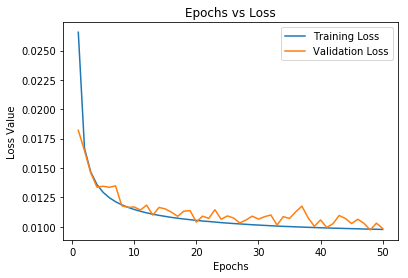

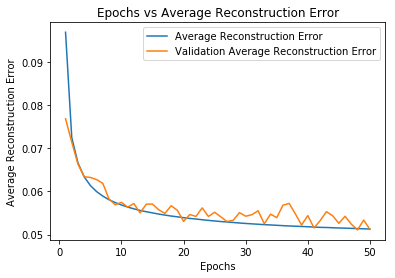

In [0]:
loss_curve(x)
reconstruction_error_curve(x)

In [0]:
score = Encoder_3_32.evaluate(test_images, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 0s 39us/step
Loss function on test set = 0.009809743483364582
Average Reconstruction Error = 0.051147897624969484


Text(0.5, 1.0, 'Image 15796 : Label #5 (Image of Sandal)')

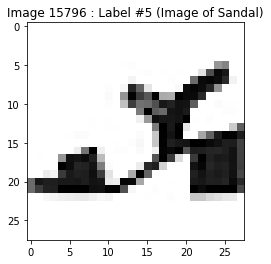

In [0]:
# Display same image
plt.imshow(train_images[r].reshape(28,28), cmap='Greys')
plt.title('Image {} : Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

Text(0.5, 1.0, 'Image 15796 Reconstruction with 1 Hidden layer and 32 Nodes: Label #5 (Image of Sandal)')

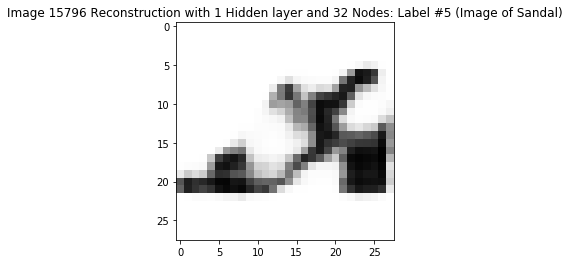

In [0]:
# Display reconstruction of the image
reconstruction = Encoder_3_32.predict(np.array([train_images[r]]))
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title('Image {} Reconstruction with 3 Hidden layer and 32 Nodes: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

#### Training Encoder with 3 Hidden layers, main layer has 64 Nodes

In [0]:
# Input layer is implicit once we provide input shape
Encoder_3_64 = Sequential()

# Hidden Layer #1 with RELU
Encoder_3_64.add(Dense(128, input_shape=(train_images.shape[1], )))
Encoder_3_64.add(Activation('relu'))

# Hidden Layer #2 (z layer) with RELU
Encoder_3_64.add(Dense(64))
Encoder_3_64.add(Activation('relu'))

# Hidden layer #3 with RELU
Encoder_3_64.add(Dense(128))
Encoder_3_64.add(Activation('relu'))

# Output Layer with Sigmoid
Encoder_3_64.add(Dense(train_images.shape[1], ))
Encoder_3_64.add(Activation('sigmoid'))

# Compiling Network
Encoder_3_64.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Encoder_3_64.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_43 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_44 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_45 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 784)               101136    
__________

In [0]:
x = Encoder_3_64.fit(train_images,
                  train_images,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 101us/step - loss: 0.0257 - average_reconstruction_error: 0.0949 - val_loss: 0.0175 - val_average_reconstruction_error: 0.0755
Epoch 2/50
54000/54000 [==============================] - 5s 90us/step - loss: 0.0157 - average_reconstruction_error: 0.0704 - val_loss: 0.0144 - val_average_reconstruction_error: 0.0674
Epoch 3/50
54000/54000 [==============================] - 5s 91us/step - loss: 0.0136 - average_reconstruction_error: 0.0645 - val_loss: 0.0125 - val_average_reconstruction_error: 0.0609
Epoch 4/50
54000/54000 [==============================] - 5s 91us/step - loss: 0.0125 - average_reconstruction_error: 0.0614 - val_loss: 0.0126 - val_average_reconstruction_error: 0.0619
Epoch 5/50
54000/54000 [==============================] - 5s 93us/step - loss: 0.0118 - average_reconstruction_error: 0.0593 - val_loss: 0.0128 - val_average_reconstruction_error: 0.0627
Epoch 6/50
5400

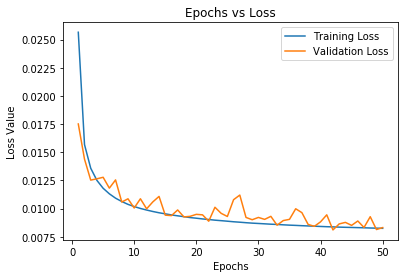

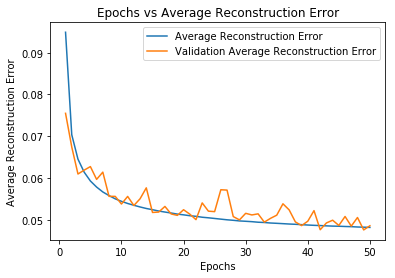

In [0]:
loss_curve(x)
reconstruction_error_curve(x)

In [0]:
score = Encoder_3_64.evaluate(test_images, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 0s 38us/step
Loss function on test set = 0.008290830560028554
Average Reconstruction Error = 0.048487627983093265


Text(0.5, 1.0, 'Image 15796 : Label #5 (Image of Sandal)')

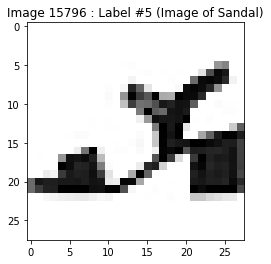

In [0]:
# Display same image
plt.imshow(train_images[r].reshape(28,28), cmap='Greys')
plt.title('Image {} : Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

Text(0.5, 1.0, 'Image 15796 Reconstruction with 3 Hidden layer and 64 Nodes: Label #5 (Image of Sandal)')

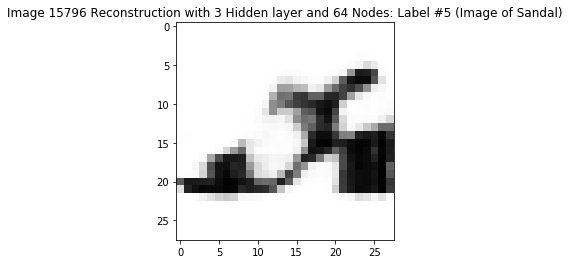

In [0]:
# Display reconstruction of the image
reconstruction = Encoder_3_64.predict(np.array([train_images[r]]))
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title('Image {} Reconstruction with 3 Hidden layer and 64 Nodes: Label #{} (Image of {})'.format(r, train_labels[r], labels[train_labels[r]]))

### Task 2 - Denoising autoencoders

Use the same data as in Task 1 for training and testing. However, before applying as input you will corrupt the images with 0 mean additive gaussian noise with some standard deviation value.

Experiment with the noise standard deviation level of 0.1, 0.2 and 0.3

 Plot a few reconstructed examples alongwith the corresponding noisy images
 
Comment on the quality and report the root mean square error between the reconstructed testing images and clean testing images for the three noise levels and the two architectures with different dimensionality of the reprenstative codes.

#### Creating Noisy Data with specific standard deviations



In [0]:
# Reshaping images for convolutional network
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Generating Noise with 0 mean and different deviations
Noise_point_1 = np.random.normal(0, 0.1, (train_images.shape[0], train_images.shape[1], train_images.shape[2], train_images.shape[3]))
Noise_point_2 = np.random.normal(0, 0.2, (train_images.shape[0], train_images.shape[1], train_images.shape[2], train_images.shape[3]))
Noise_point_3 = np.random.normal(0, 0.3, (train_images.shape[0], train_images.shape[1], train_images.shape[2], train_images.shape[3]))

Noise_point_1_test = np.random.normal(0, 0.1, (test_images.shape[0], test_images.shape[1], test_images.shape[2], test_images.shape[3]))
Noise_point_2_test = np.random.normal(0, 0.2, (test_images.shape[0], test_images.shape[1], test_images.shape[2], test_images.shape[3]))
Noise_point_3_test = np.random.normal(0, 0.3, (test_images.shape[0], test_images.shape[1], test_images.shape[2], test_images.shape[3]))

# Adding noise to the training
train_images_noise_1 = train_images + Noise_point_1
train_images_noise_2 = train_images + Noise_point_2
train_images_noise_3 = train_images + Noise_point_3

# Adding noise to the testing
test_images_noise_1 = test_images + Noise_point_1_test
test_images_noise_2 = test_images + Noise_point_2_test
test_images_noise_3 = test_images + Noise_point_3_test

# Final Lengths of All Data
print("\n-------- Final Dimensions --------")
print("Length of Training Images = " + str(train_images.shape))
print("Length of Test Images = " + str(test_images.shape))
print("Length of Noisy Training Images = " + str(train_images_noise_1.shape))
print("Length of Noisy Test Images = " + str(test_images_noise_1.shape))


-------- Final Dimensions --------
Length of Training Images = (60000, 28, 28, 1)
Length of Test Images = (10000, 28, 28, 1)
Length of Noisy Training Images = (60000, 28, 28, 1)
Length of Noisy Test Images = (10000, 28, 28, 1)


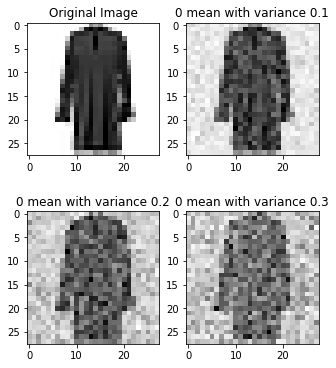

In [0]:
# Random image in dataset
r = np.random.randint(train_images.shape[0] + 1)

# Plotting all
plt.subplot(221)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

plt.subplot(222)
plt.imshow(train_images_noise_1[r].reshape((28, 28)), cmap='Greys')
plt.title("0 mean with variance 0.1")

plt.subplot(223)
plt.imshow(train_images_noise_2[r].reshape((28, 28)), cmap='Greys')
plt.title("0 mean with variance 0.2")

plt.subplot(224)
plt.imshow(train_images_noise_3[r].reshape((28, 28)), cmap='Greys')
plt.title("0 mean with variance 0.3")

plt.subplots_adjust(bottom=0.1, right=0.8, top=1.3)
plt.show()

#### 32 node convolutional autoencoder

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose

# Making a denoising autoencoder with 32 main hidden nodes
Denoising_32 = Sequential()

# Input layer is implicit when we define the first layer with 3x3 filter
Denoising_32.add(Conv2D(32, (3,3), padding='same', input_shape=(train_images.shape[1], train_images.shape[2], 1)))
Denoising_32.add(Activation('relu'))

# Max pooling layer 2x2 pooling
Denoising_32.add(MaxPooling2D((2,2)))

# Middle layer (z) 
Denoising_32.add(Conv2D(32, (3,3), padding='same'))
Denoising_32.add(Activation('relu'))

# Decoder first layer
Denoising_32.add(MaxPooling2D((2,2)))

# Decoder second layer
Denoising_32.add(Conv2DTranspose(32, (3,3), padding='same', strides=(2,2)))
Denoising_32.add(Activation('relu'))

# Final Decoder Layer
Denoising_32.add(Conv2DTranspose(1, (3,3), padding='same', strides=(2,2)))
Denoising_32.add(Activation('sigmoid'))

Denoising_32.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Denoising_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_81 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_82 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 14, 14, 32)        9248      
__________

##### Training on Noise = 0.1 std

In [0]:
Point_1_32 = Denoising_32.fit(train_images_noise_1,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 3s 56us/step - loss: 0.0038 - average_reconstruction_error: 0.0321 - val_loss: 0.0039 - val_average_reconstruction_error: 0.0333
Epoch 2/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0038 - average_reconstruction_error: 0.0320 - val_loss: 0.0037 - val_average_reconstruction_error: 0.0320
Epoch 3/65
54000/54000 [==============================] - 3s 50us/step - loss: 0.0038 - average_reconstruction_error: 0.0321 - val_loss: 0.0038 - val_average_reconstruction_error: 0.0323
Epoch 4/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0038 - average_reconstruction_error: 0.0320 - val_loss: 0.0037 - val_average_reconstruction_error: 0.0321
Epoch 5/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0038 - average_reconstruction_error: 0.0320 - val_loss: 0.0037 - val_average_reconstruction_error: 0.0319
Epoch 6/65
54000

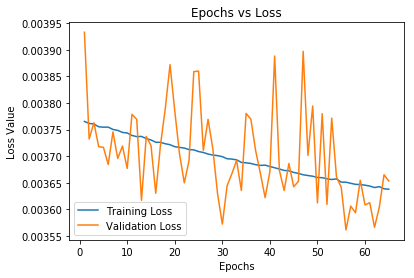

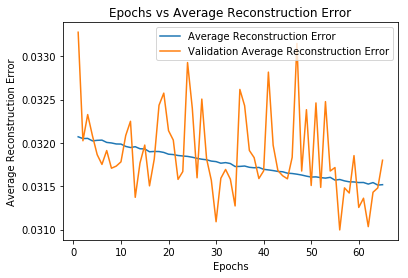

In [0]:
loss_curve(Point_1_32)
reconstruction_error_curve(Point_1_32)

In [0]:
score = Denoising_32.evaluate(test_images_noise_1, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 1s 53us/step
Loss function on test set = 0.003687629136443138
Average Reconstruction Error = 0.031920286685228345


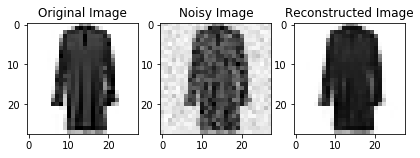

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_1[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_32.predict(np.array([train_images_noise_1[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

##### Training on Noise = 0.2 std

In [0]:
Point_2_32 = Denoising_32.fit(train_images_noise_2,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 3s 64us/step - loss: 0.0064 - average_reconstruction_error: 0.0424 - val_loss: 0.0062 - val_average_reconstruction_error: 0.0422
Epoch 2/65
54000/54000 [==============================] - 3s 55us/step - loss: 0.0062 - average_reconstruction_error: 0.0420 - val_loss: 0.0063 - val_average_reconstruction_error: 0.0425
Epoch 3/65
54000/54000 [==============================] - 3s 56us/step - loss: 0.0062 - average_reconstruction_error: 0.0419 - val_loss: 0.0061 - val_average_reconstruction_error: 0.0416
Epoch 4/65
54000/54000 [==============================] - 3s 51us/step - loss: 0.0062 - average_reconstruction_error: 0.0419 - val_loss: 0.0061 - val_average_reconstruction_error: 0.0415
Epoch 5/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0062 - average_reconstruction_error: 0.0418 - val_loss: 0.0061 - val_average_reconstruction_error: 0.0416
Epoch 6/65
54000

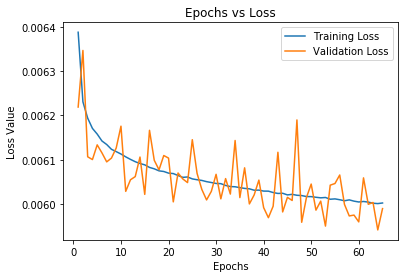

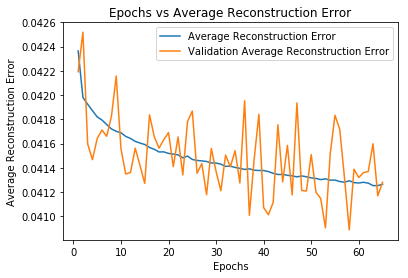

In [0]:
loss_curve(Point_2_32)
reconstruction_error_curve(Point_2_32)

In [0]:
score = Denoising_32.evaluate(test_images_noise_2, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 0s 50us/step
Loss function on test set = 0.006031983755528927
Average Reconstruction Error = 0.041415952122211455


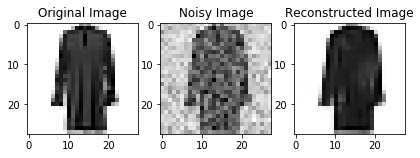

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_2[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_32.predict(np.array([train_images_noise_2[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

##### Training on Noise = 0.3 std

In [0]:
Point_3_32 = Denoising_32.fit(train_images_noise_3,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 3s 50us/step - loss: 0.0092 - average_reconstruction_error: 0.0519 - val_loss: 0.0092 - val_average_reconstruction_error: 0.0518
Epoch 2/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0091 - average_reconstruction_error: 0.0518 - val_loss: 0.0091 - val_average_reconstruction_error: 0.0519
Epoch 3/65
54000/54000 [==============================] - 3s 48us/step - loss: 0.0091 - average_reconstruction_error: 0.0518 - val_loss: 0.0091 - val_average_reconstruction_error: 0.0519
Epoch 4/65
54000/54000 [==============================] - 3s 47us/step - loss: 0.0091 - average_reconstruction_error: 0.0517 - val_loss: 0.0091 - val_average_reconstruction_error: 0.0526
Epoch 5/65
54000/54000 [==============================] - 3s 47us/step - loss: 0.0091 - average_reconstruction_error: 0.0517 - val_loss: 0.0090 - val_average_reconstruction_error: 0.0520
Epoch 6/65
54000

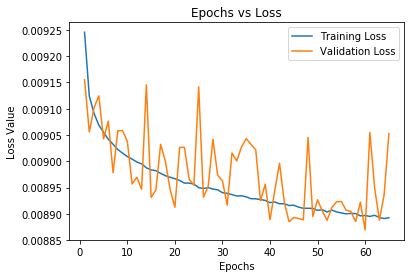

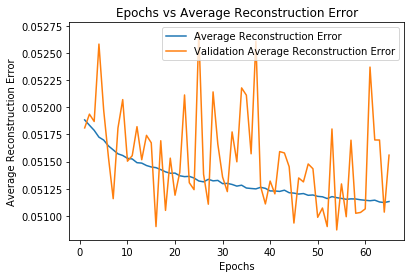

In [0]:
loss_curve(Point_3_32)
reconstruction_error_curve(Point_3_32)

In [0]:
score = Denoising_32.evaluate(test_images_noise_3, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 1s 51us/step
Loss function on test set = 0.009111920884251595
Average Reconstruction Error = 0.05177209037542343


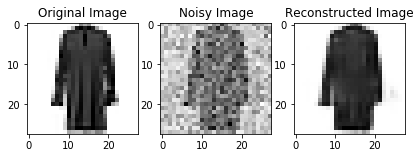

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_3[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_32.predict(np.array([train_images_noise_3[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

#### 64 node convolutional autoencoder

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose

# Making a denoising autoencoder with 32 main hidden nodes
Denoising_64 = Sequential()

# Input layer is implicit when we define the first layer with 3x3 filter
Denoising_64.add(Conv2D(64, (3,3), padding='same', input_shape=(train_images.shape[1], train_images.shape[2], 1)))
Denoising_64.add(Activation('relu'))

# Max pooling layer 2x2 pooling
Denoising_64.add(MaxPooling2D((2,2)))

# Middle layer (z) 
Denoising_64.add(Conv2D(64, (3,3), padding='same'))
Denoising_64.add(Activation('relu'))

# Decoder first layer
Denoising_64.add(MaxPooling2D((2,2)))

# Decoder second layer
Denoising_64.add(Conv2DTranspose(64, (3,3), padding='same', strides=(2,2)))
Denoising_64.add(Activation('relu'))

# Final Decoder Layer
Denoising_64.add(Conv2DTranspose(1, (3,3), padding='same', strides=(2,2)))
Denoising_64.add(Activation('sigmoid'))

Denoising_64.compile(optimizer='rmsprop',
                  loss='mean_squared_error',
                  metrics=[average_reconstruction_error])

Denoising_64.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
activation_85 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
activation_86 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 14, 14, 64)        36928     
__________

##### Training on Noise = 0.1 std

In [0]:
Point_1_64 = Denoising_64.fit(train_images_noise_1,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 5s 89us/step - loss: 0.0229 - average_reconstruction_error: 0.0922 - val_loss: 0.0126 - val_average_reconstruction_error: 0.0641
Epoch 2/65
54000/54000 [==============================] - 4s 73us/step - loss: 0.0104 - average_reconstruction_error: 0.0558 - val_loss: 0.0082 - val_average_reconstruction_error: 0.0497
Epoch 3/65
54000/54000 [==============================] - 4s 74us/step - loss: 0.0075 - average_reconstruction_error: 0.0468 - val_loss: 0.0069 - val_average_reconstruction_error: 0.0454
Epoch 4/65
54000/54000 [==============================] - 4s 75us/step - loss: 0.0063 - average_reconstruction_error: 0.0425 - val_loss: 0.0064 - val_average_reconstruction_error: 0.0437
Epoch 5/65
54000/54000 [==============================] - 4s 71us/step - loss: 0.0056 - average_reconstruction_error: 0.0399 - val_loss: 0.0056 - val_average_reconstruction_error: 0.0407
Epoch 6/65
54000

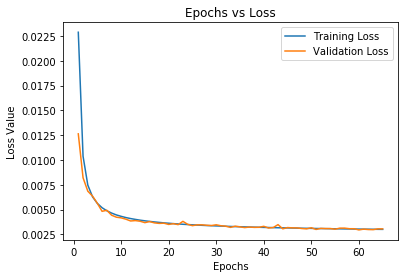

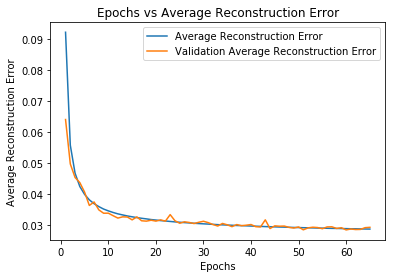

In [0]:
loss_curve(Point_1_64)
reconstruction_error_curve(Point_1_64)

In [0]:
score = Denoising_64.evaluate(test_images_noise_1, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 1s 54us/step
Loss function on test set = 0.003099222215265036
Average Reconstruction Error = 0.029463434207439423


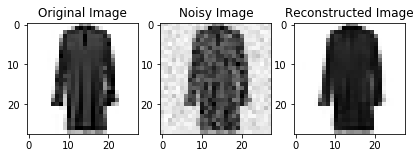

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_1[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_64.predict(np.array([train_images_noise_1[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

##### Training on Noise = 0.2 std

In [0]:
Point_2_64 = Denoising_64.fit(train_images_noise_2,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 4s 74us/step - loss: 0.0058 - average_reconstruction_error: 0.0400 - val_loss: 0.0056 - val_average_reconstruction_error: 0.0391
Epoch 2/65
54000/54000 [==============================] - 4s 66us/step - loss: 0.0056 - average_reconstruction_error: 0.0396 - val_loss: 0.0055 - val_average_reconstruction_error: 0.0393
Epoch 3/65
54000/54000 [==============================] - 4s 70us/step - loss: 0.0056 - average_reconstruction_error: 0.0395 - val_loss: 0.0055 - val_average_reconstruction_error: 0.0397
Epoch 4/65
54000/54000 [==============================] - 4s 74us/step - loss: 0.0055 - average_reconstruction_error: 0.0395 - val_loss: 0.0055 - val_average_reconstruction_error: 0.0397
Epoch 5/65
54000/54000 [==============================] - 4s 68us/step - loss: 0.0055 - average_reconstruction_error: 0.0394 - val_loss: 0.0056 - val_average_reconstruction_error: 0.0400
Epoch 6/65
54000

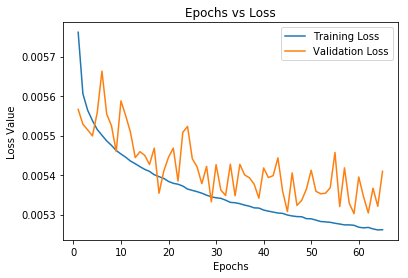

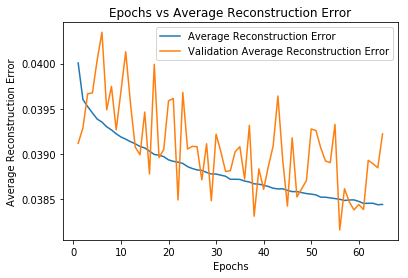

In [0]:
loss_curve(Point_2_64)
reconstruction_error_curve(Point_2_64)

In [0]:
score = Denoising_64.evaluate(test_images_noise_2, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 1s 57us/step
Loss function on test set = 0.005457083500921727
Average Reconstruction Error = 0.039373570889234544


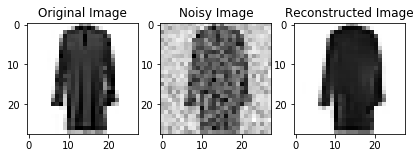

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_2[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_64.predict(np.array([train_images_noise_2[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

##### Training on Noise = 0.3 std

In [0]:
Point_3_64 = Denoising_64.fit(train_images_noise_3,
                  train_images,
                  batch_size=128,
                  epochs=65,
                  validation_split=0.1,
                  verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/65
54000/54000 [==============================] - 4s 74us/step - loss: 0.0085 - average_reconstruction_error: 0.0493 - val_loss: 0.0085 - val_average_reconstruction_error: 0.0485
Epoch 2/65
54000/54000 [==============================] - 4s 73us/step - loss: 0.0084 - average_reconstruction_error: 0.0492 - val_loss: 0.0084 - val_average_reconstruction_error: 0.0486
Epoch 3/65
54000/54000 [==============================] - 4s 72us/step - loss: 0.0083 - average_reconstruction_error: 0.0491 - val_loss: 0.0083 - val_average_reconstruction_error: 0.0491
Epoch 4/65
54000/54000 [==============================] - 4s 72us/step - loss: 0.0083 - average_reconstruction_error: 0.0490 - val_loss: 0.0085 - val_average_reconstruction_error: 0.0504
Epoch 5/65
54000/54000 [==============================] - 4s 72us/step - loss: 0.0083 - average_reconstruction_error: 0.0490 - val_loss: 0.0083 - val_average_reconstruction_error: 0.0500
Epoch 6/65
54000

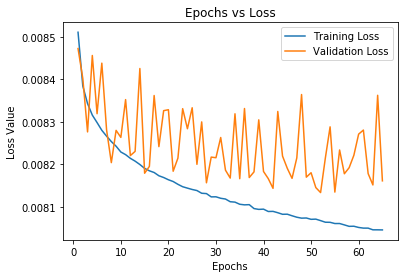

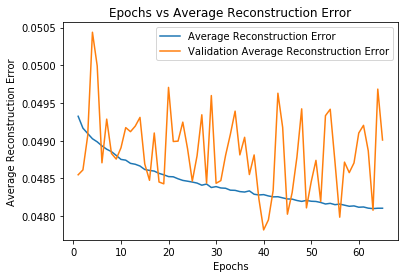

In [0]:
loss_curve(Point_3_64)
reconstruction_error_curve(Point_3_64)

In [0]:
score = Denoising_64.evaluate(test_images_noise_3, test_images, batch_size=32)

print("Loss function on test set = " + str(score[0]))
print("Average Reconstruction Error = " + str(score[1]))

10000/10000 [==============================] - 1s 51us/step
Loss function on test set = 0.008227829931676388
Average Reconstruction Error = 0.049244497227668764


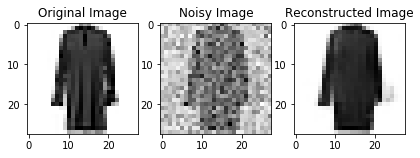

In [0]:
# Plotting original
plt.subplot(131)
plt.imshow(train_images[r].reshape((28, 28)), cmap='Greys')
plt.title("Original Image")

# Plotting noisy version
plt.subplot(132)
plt.imshow(train_images_noise_3[r].reshape((28, 28)), cmap='Greys')
plt.title("Noisy Image")

# Display reconstruction of the image
reconstruction = Denoising_64.predict(np.array([train_images_noise_3[r]]))
plt.subplot(133)
plt.imshow(reconstruction.reshape(28,28), cmap='Greys')
plt.title("Reconstructed Image")

plt.subplots_adjust(bottom=0.1, right=1)
plt.show()

### Task 3 -  LSTM networks

Data that is given to you are sequences of accelerometer and gyroscope data from an IMU attached to the shoe of three subjects. The subjects are asked to walk/run on a treadmill at 12 different speeds.

The 'sequences' tensor has the dimensions n sequences x length of sequence x 6 features. The 6 features has 3 for accelerometer data and 3 for gyroscope data. Each seuqnce is approximately six seconds long. 'The ground_truth' is a vector with values representing the speed of the subjects in km/hr. Note that this speed estimation problem is a regression problem.

Use the data for subject 1 as training and the data for subject 2 as validation. Build your own LSTM network, you can experiment with different parameters/hyper-parameters. Pick the structure that
gives you the best performance.

Now combine the data for subject 1 and subject 2. That is, use the sequences from both of theese subjects as the new training data. Retraing the LSTM network with the best parameters/hyper-parameters from the previous step.

Now test on the sequences from Subject 4. Report the average root mean squated error for speed estimation, both on the training data and testing data.

#### Import all subject data



In [1]:
# Uploaded all data to my google drive and loaded it from there 
# so that nothing is lost if run time crashes

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('/content/gdrive/My Drive/Homework_4/Subject 1.pickle', 'rb') as f:
 sequences_1, ground_truth_1 = pickle.load(f)

with open('/content/gdrive/My Drive/Homework_4/Subject 2.pickle', 'rb') as f:
 sequences_2, ground_truth_2 = pickle.load(f)

with open('/content/gdrive/My Drive/Homework_4/Subject 4.pickle', 'rb') as f:
 sequences_4, ground_truth_4 = pickle.load(f)

# Reshape output
ground_truth_1 = np.reshape(ground_truth_1, (-1, 1))
ground_truth_2 = np.reshape(ground_truth_2, (-1, 1))
ground_truth_4 = np.reshape(ground_truth_4, (-1, 1))

# Final Lengths of All Data
print("\n-------- Final Dimensions --------")
print("Length of Sequences 1 = " + str(sequences_1.shape))
print("Length of Ground Truth 1 = " + str(ground_truth_1.shape))
print("Length of Sequences 2 = " + str(sequences_2.shape))
print("Length of Ground Truth 2 = " + str(ground_truth_2.shape))
print("Length of Sequences 4 = " + str(sequences_4.shape))
print("Length of Ground Truth 4 = " + str(ground_truth_4.shape))


-------- Final Dimensions --------
Length of Sequences 1 = (12000, 600, 6)
Length of Ground Truth 1 = (12000, 1)
Length of Sequences 2 = (12000, 600, 6)
Length of Ground Truth 2 = (12000, 1)
Length of Sequences 4 = (12000, 600, 6)
Length of Ground Truth 4 = (12000, 1)


In [0]:
# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

#### Training with Subject 1 and Validating with Subject 2

In [3]:
from keras.models import Sequential  
from keras.layers import Dense, LSTM, Dropout

Network = Sequential()

Network.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(sequences_1.shape[1], sequences_1.shape[2])))      

Network.add(LSTM(units=200, activation='tanh', return_sequences=True))  

Network.add(LSTM(units=200, activation='tanh'))      

Network.add(Dense(1, activation='relu'))
            
Network.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['acc'])

Network.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 600, 200)          165600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 600, 200)          320800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 807,401
Trainable params: 807,401
Non-trainable params: 0
_________________________________________________________________


In [6]:
Result = Network.fit(sequences_1,
            ground_truth_1,
            epochs = 3,
            validation_data=(sequences_2, ground_truth_2),
            batch_size = 148,
            verbose=1)  

Train on 12000 samples, validate on 12000 samples
Epoch 1/3
12000/12000 [==============================] - 299s 25ms/step - loss: 0.1321 - acc: 0.4390 - val_loss: 1.1114 - val_acc: 0.1842
Epoch 2/3
12000/12000 [==============================] - 299s 25ms/step - loss: 0.1060 - acc: 0.4560 - val_loss: 2.5601 - val_acc: 0.1346
Epoch 3/3
12000/12000 [==============================] - 300s 25ms/step - loss: 0.0918 - acc: 0.4565 - val_loss: 1.7333 - val_acc: 0.1515


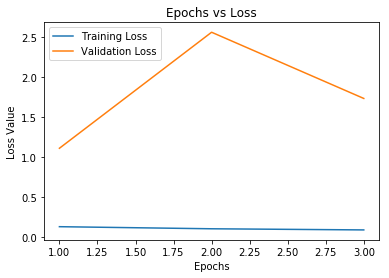

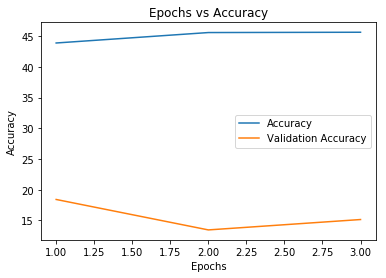

In [7]:
loss_curve(Result)
accuracy(Result)

#### Training with Subject 1 and 2, Testing on Subject 4

In [8]:
Subject_1_2_Mix = np.concatenate((sequences_1, sequences_2),axis=0)
Truth_1_2_Mix = np.concatenate((ground_truth_1, ground_truth_2),axis=0)

# Final Lengths of All Data
print("\n-------- Final Dimensions --------")
print("Length of Sequences 1 and 2 Mix = " + str(Subject_1_2_Mix.shape))
print("Length of Ground Truth 1 and 2 Mix = " + str(Truth_1_2_Mix.shape))
print("Length of Sequences 4 = " + str(sequences_4.shape))
print("Length of Ground Truth 4 = " + str(ground_truth_4.shape))


-------- Final Dimensions --------
Length of Sequences 1 and 2 Mix = (24000, 600, 6)
Length of Ground Truth 1 and 2 Mix = (24000, 1)
Length of Sequences 4 = (12000, 600, 6)
Length of Ground Truth 4 = (12000, 1)


In [9]:
from keras.models import Sequential  
from keras.layers import Dense, LSTM, Dropout

Network = Sequential()

Network.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(Subject_1_2_Mix.shape[1], Subject_1_2_Mix.shape[2])))      

Network.add(LSTM(units=200, activation='tanh', return_sequences=True))  

Network.add(LSTM(units=200, activation='tanh'))      

Network.add(Dense(1, activation='relu'))
            
Network.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['acc'])

Network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 600, 200)          165600    
_________________________________________________________________
lstm_5 (LSTM)                (None, 600, 200)          320800    
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 807,401
Trainable params: 807,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
Result = Network.fit(sequences_1,
            ground_truth_1,
            epochs = 3,
            batch_size = 148,
            verbose=1)  

Epoch 1/3
12000/12000 [==============================] - 219s 18ms/step - loss: 1.7309 - acc: 0.2147
Epoch 2/3
12000/12000 [==============================] - 212s 18ms/step - loss: 0.3302 - acc: 0.3410
Epoch 3/3
12000/12000 [==============================] - 213s 18ms/step - loss: 0.1852 - acc: 0.4003


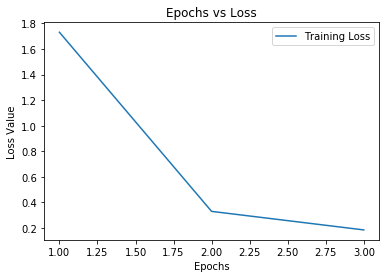

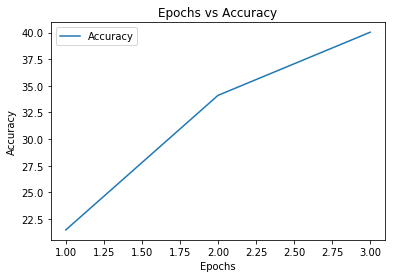

In [13]:
loss_curve(Result)
accuracy(Result)

In [15]:
score = Network.evaluate(sequences_4, ground_truth_4, batch_size=148)

print("Loss function on test set = " + str(score[0]))
print("Accuracy = " + str(score[1]))

12000/12000 [==============================] - 76s 6ms/step
Loss function on test set = 2.5883203888442368
Accuracy = 0.11099999967838327


### Task 4 - Variational Autoencoders

Using regular autoencoders one of the main limitations is that the the latent space it converts inputs to is not always continuous. This means we cannot easily interpolate between different points of the latent space. This means if we randomly sample from the latent space we do not always get some meaningful variation of an input image and therefore using an decoder means we cannot truly generate new or interpolated data by sampling.

Variational autoencoders solve this and allow for generative modelling because the latent spaces they map to are always continous and can easily be sampled. To do this the encoder outputs a mean and standard deviation for a gaussian distributed variable, so the decoder now does not get a fixed value but instead it samples a gaussian distributed region. 

The decoder then samples this region for points when decoding and this teaches it that a specific point is not referring to a sample of a class but instead the entire region corresponds to a class. Through training the decoder learns the mean and standard deviations but it may place classes far apart in the latent space even though they may be close to each other. To prevent it from doing this the loss function also includes the KL divergence which is a measure of how much two distributions diverge from each other so by forcing the network to minimize the loss function we can also force it to minimize the KL divergence and keep the different class distributions close to each other.

The loss function also contains a reconstruction loss that ensures the the sampled data is reconstructed to the original input.

